# Images
> Image widgets for jupyter noteook

In [1]:
# default_exp images.widgets

## Imports

In [2]:
# export
import base64
from io import BytesIO
from PIL import Image

## Data url for img tag
### Use data url in ```<img src='data:...'>```

In [3]:
# export
def image_to_base64(
    img: Image
) -> str:
    """
    Transform PIL Image to base64 for API
    Return:
        - base64 encoded image bytes
    """
    img = img.convert('RGB')
    output_buffer = BytesIO()
    img.save(output_buffer, format='JPEG')
    byte_data = output_buffer.getvalue()
    base64_str = base64.b64encode(byte_data)
    return base64_str.decode()

def data_url(
    img: Image
) -> str:
    """
    Return:
        - data url string,
            can be used as the src value of <img>
    """
    return f"data:image/jpg;base64,{image_to_base64(img)}"

### Preview images in jupyter notebook

In [4]:
# export
def image_dom(
    img: Image,
    **kwargs
):
    """
    Create <img> tag with src='data:...'
        with PIL.Image object
    return forgebox.html.DOM
    """
    from forgebox.html import DOM
    
    img_dom = DOM("","img",dict(
        src=data_url(img),
    ))
    kwargs.update({"style": "padding:3px"})
    div_dom = DOM("","div",kwargs)
    div_dom.append(img_dom)
    return div_dom

def view_images(
    *images,
    num_per_row=4,
):
    """
    Create <div> wraping up images
    view_images(
        img1, img2, img3,
        img4, img5, img6,
        img7)()
    """
    from forgebox.html import DOM
    frame = DOM("","div",{"class":"row"})
    assert num_per_row in [1, 2, 3, 4, 6, 12],\
        "num_per_row should be in [1, 2, 3, 4, 6, 12]"
    col = 12//num_per_row
    
    for img in images:
        frame.append(image_dom(img,**{"class": f"col-sm-{col}"}))
    return frame

## Test on image preview

In [5]:
import os

Original image

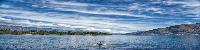

In [6]:
HOME = os.environ['HOME']
img = Image.open(f"{HOME}/Pictures/img02.jpg").resize((200,50))
img

Data url of the image

In [7]:
data_url(img)[:100]

'data:image/jpg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHB'

Visualize single image


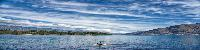

In [8]:
image_dom(img)()

Visualize serveral images


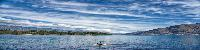
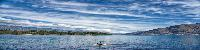
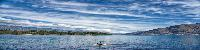
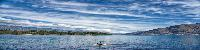
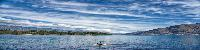
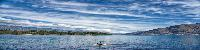

In [9]:
view_images(img, img, img, img, img, img,)()

Contains more images in a row


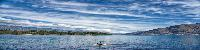
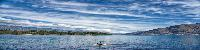
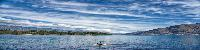
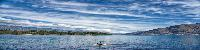
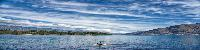
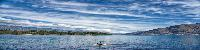

In [10]:
view_images(
    img, img, img, img, img, img,
    num_per_row=6)()